## MAKING CLASSIFICATION DATASET 

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import torch 
from torch import nn 
import sklearn
from sklearn.datasets import make_circles

In [18]:
# make 1000 samples 
n_samples = 1000
X , y = make_circles(n_samples=n_samples , noise=0.03 , random_state=42 , )

In [19]:
len(X) , len(y)

(1000, 1000)

In [20]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [21]:
y[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [22]:
circles = pd.DataFrame({"X1":X[: , 0] , "X2":X[: , 1] , "label":y})

In [23]:
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


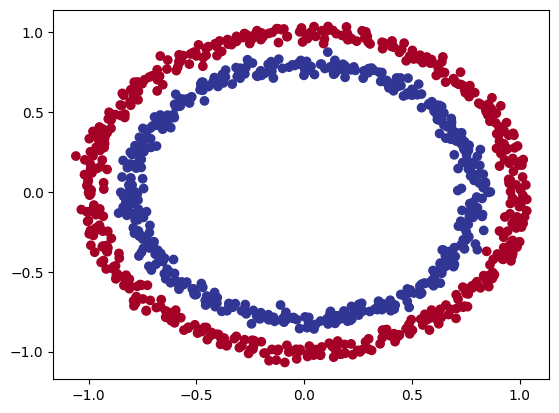

In [24]:
plt.scatter(x=X[: , 0] , y = X[: , 1] , c = y , cmap=plt.cm.RdYlBu)

here we will be basically predicting if the x1 , and x2 are lying in the red circle or the blue circle

In [25]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [26]:
# its an array , but we are working with pytorch , hence we will convert it into tensors 
X=torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [27]:
X ,y 

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [29]:
X.dtype , y.dtype

(torch.float32, torch.float32)

In [95]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [96]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

In [97]:
import torch 
from torch import nn 

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [117]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=32)
        self.layer_2 = nn.Linear(in_features=32, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=8)
        self.layer_4 = nn.Linear(in_features=8, out_features=4)
        self.layer_5 = nn.Linear(in_features=4, out_features=1)

    def forward(self, x):
        x = torch.relu(self.layer_1(x))
        x = torch.relu(self.layer_2(x))
        x = torch.relu(self.layer_3(x))
        x = torch.relu(self.layer_4(x))
        x = self.layer_5(x)
        return x

In [118]:
model_0_replicate = nn.Sequential(
    nn.Linear(in_features=2 , out_features=16),
    nn.Linear(in_features=16 , out_features=4),
    nn.Linear(in_features= 4 ,out_features=1 )
).to(device)

In [101]:
# sequential knows what to do with the forward functions , so it does it in behind the scenes 

In [119]:
#setup for loss function and optimiser 
model_0 = BinaryClassifier().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

In [120]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_true)) * 100
    return acc


In [108]:
model_0

binaryclassifier(
  (layer_1): Linear(in_features=2, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=8, bias=True)
  (layer_4): Linear(in_features=8, out_features=4, bias=True)
  (layer_5): Linear(in_features=4, out_features=2, bias=True)
  (layer_6): Linear(in_features=2, out_features=1, bias=True)
)

In [109]:
model_0.eval()
with torch.no_grad():
    y_logits = model_0(X_test)
y_logits[:5]

tensor([[ 0.0280],
        [ 0.0518],
        [-0.0321],
        [ 0.0451],
        [-0.0287]])

In [110]:
#use the sigmoid function on our model to convert model logits to turn them into prediction probabilities 
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5070],
        [0.5129],
        [0.4920],
        [0.5113],
        [0.4928]])

In [111]:
y_preds = torch.round(y_pred_probs)
y_preds[:5]

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.]])

In [112]:
with torch.no_grad():
    y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)))
    y_pred_labels[:5]
y_pred_labels.squeeze(dim=-1).shape , y_test.shape

(torch.Size([200]), torch.Size([200]))

In [113]:
def logitstolabel(y_logit):
    return torch.round(torch.sigmoid(y_logit))

In [121]:
epochs = 1000
for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.sigmoid(y_logits)
    loss = loss_fn(y_logits, y_train.squeeze())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_labels = torch.round(y_pred)
    accuracy = accuracy_fn(y_train, y_pred_labels)
    
    if epoch % 100 == 0:
        print(f"EPOCH: {epoch} | TRAIN LOSS: {loss.item()} | TRAIN ACCURACY: {accuracy}")


EPOCH: 0 | TRAIN LOSS: 0.6959197521209717 | TRAIN ACCURACY: 50.0
EPOCH: 100 | TRAIN LOSS: 0.6474794745445251 | TRAIN ACCURACY: 95.125
EPOCH: 200 | TRAIN LOSS: 0.18203938007354736 | TRAIN ACCURACY: 99.875
EPOCH: 300 | TRAIN LOSS: 0.02464332990348339 | TRAIN ACCURACY: 100.0
EPOCH: 400 | TRAIN LOSS: 0.008414089679718018 | TRAIN ACCURACY: 100.0
EPOCH: 500 | TRAIN LOSS: 0.003953590057790279 | TRAIN ACCURACY: 100.0
EPOCH: 600 | TRAIN LOSS: 0.0019255090737715364 | TRAIN ACCURACY: 100.0
EPOCH: 700 | TRAIN LOSS: 0.0011745159281417727 | TRAIN ACCURACY: 100.0
EPOCH: 800 | TRAIN LOSS: 0.0007954610628075898 | TRAIN ACCURACY: 100.0
EPOCH: 900 | TRAIN LOSS: 0.000573445693589747 | TRAIN ACCURACY: 100.0


In [122]:
model_0.eval()
with torch.no_grad():
    y_test_logits = model_0(X_test).squeeze()
    y_test_pred = torch.sigmoid(y_test_logits)
    y_test_pred_labels = torch.round(y_test_pred)
    test_accuracy = accuracy_fn(y_test, y_test_pred_labels)
    print(f"TEST ACCURACY: {test_accuracy}")

TEST ACCURACY: 100.0


In [116]:
loss_fn

BCEWithLogitsLoss()

In [127]:
import requests 
from pathlib import Path 
if Path("helper_functions.py").is_file():
    print("HELPER FUNCTION FILE EXISTS ")
else :
    print("DOWNLOADING HELPER FUNCTIONS FILE ")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open("helper_function.py" , "wb") as file :
        file.write(request.content)

DOWNLOADING HELPER FUNCTIONS FILE 


In [128]:
from helper_function import plot_predictions , plot_decision_boundary

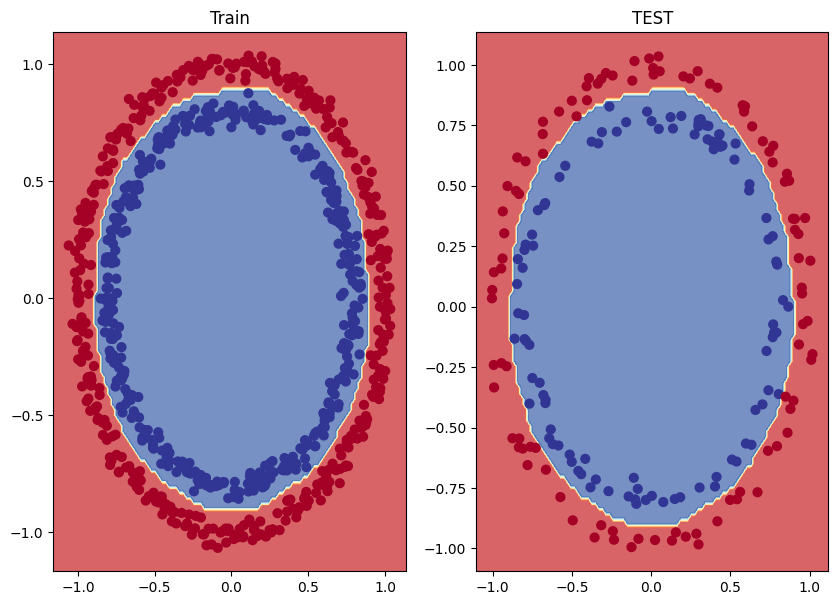

In [129]:
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0 , X_train , y_train)
plt.subplot(1,2,2)
plt.title("TEST")
plot_decision_boundary(model_0 , X_test , y_test)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


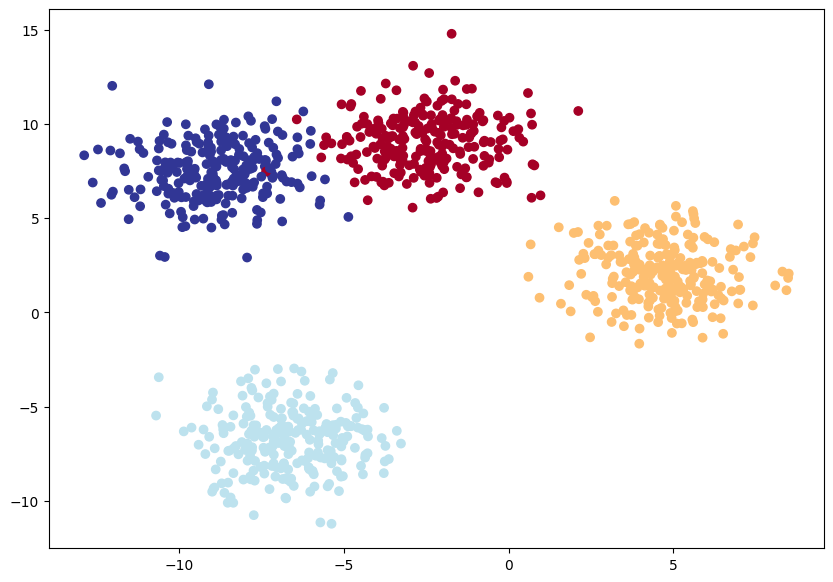

In [130]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [141]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [142]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [143]:
model_4(X_blob_train.to(device))[:5]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]], grad_fn=<SliceBackward0>)

In [144]:
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], grad_fn=<SliceBackward0>)
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], grad_fn=<SliceBackward0>)


In [145]:

print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.3169, 0.3244, 0.1405, 0.2182], grad_fn=<SelectBackward0>)
tensor(1)


In [154]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    if epoch % 10000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 0.01079, Acc: 99.50% | Test Loss: 0.00233, Test Acc: 100.00%


In [155]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 2.6546e+00,  3.5478e+01, -3.0047e+01, -3.9846e+01],
        [-7.2175e+00, -1.7886e+01, -1.5198e+01,  1.3234e+01],
        [-1.4127e+02, -3.3618e+01,  5.2949e+01,  4.0649e+01],
        [-9.2605e+00,  3.4622e+01, -2.0185e+01, -2.6873e+01],
        [ 3.2365e+01,  2.9944e+00, -2.5754e+01, -3.5383e+01],
        [-1.2622e+01, -2.1950e+01, -1.6489e+01,  1.7082e+01],
        [-1.2616e+02, -2.9970e+01,  4.7305e+01,  3.6645e+01],
        [ 2.2224e+01, -2.5195e+00, -2.0817e+01, -1.9085e+01],
        [-1.7206e+02, -4.1086e+01,  6.4231e+01,  4.9269e+01],
        [ 2.6247e+01, -1.2049e-01, -2.1772e+01, -2.5438e+01]])

In [156]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 100.0%


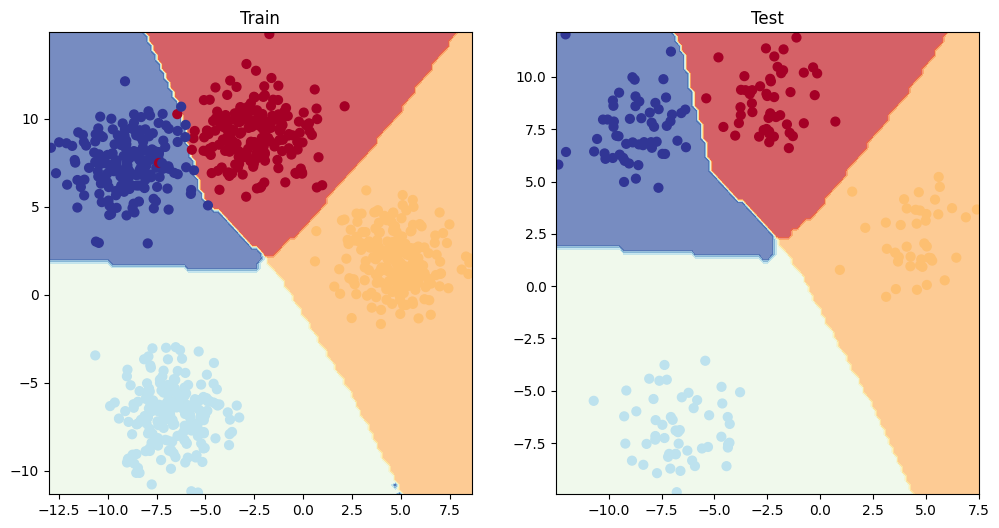

In [157]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)